In [1]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, MaxPooling2D,LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import cv2
import random
import glob

In [2]:
import os
import cv2
os.chdir(r"D:\MACHINE_LEARNING\bacteriaLSTM")

data = []
IMG_SIZE = 128

path = r"D:/MACHINE_LEARNING/bacteriaLSTM/"

In [3]:
def create_data():   
    count = 0
    for folder in os.listdir(path):
        print("FOLDER: ",folder)
        for filename in os.listdir(path + folder):
            if(".JPG" in filename): 
                temp_path = path + folder + "/" + filename
                count += 1
                try:
                    img_array = cv2.imread(temp_path)
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    data.append(img_array)
                    print("image processed..." + str(count) , end="\r")
                
                except Exception as e:
                    pass       
create_data()

FOLDER:  2021-02-27
FOLDER:  2021-03-010
FOLDER:  2021-03-030
FOLDER:  2021-03-041
FOLDER:  2021-03-0836
FOLDER:  2021-03-0957
FOLDER:  2021-03-1080
FOLDER:  2021-06-2141
FOLDER:  2021-06-2316
FOLDER:  2021-06-2587
FOLDER:  2021-06-2863
FOLDER:  2021-06-30034
FOLDER:  2021-07-01135
FOLDER:  2021-07-02232


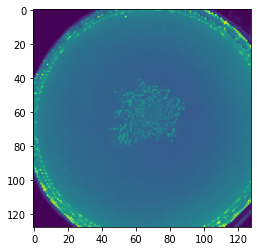

In [4]:
import matplotlib.pyplot as plt
plt.imshow(data[1200])

In [5]:
train_data = data

In [6]:
#Resizing the data

train_data = np.array(train_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(len(train_data))
train_data = train_data/255.0
print(train_data[0][10])

1608
[[0.03529412]
 [0.03137255]
 [0.03529412]
 [0.03529412]
 [0.07058824]
 [0.04313725]
 [0.04705882]
 [0.06666667]
 [0.23921569]
 [0.10196078]
 [0.10196078]
 [0.10588235]
 [0.1372549 ]
 [1.        ]
 [0.55686275]
 [0.4627451 ]
 [0.55294118]
 [0.55686275]
 [0.45098039]
 [0.47843137]
 [0.42745098]
 [0.41568627]
 [0.41176471]
 [0.4       ]
 [0.4       ]
 [0.39607843]
 [0.38039216]
 [0.37254902]
 [0.38823529]
 [0.38431373]
 [0.38039216]
 [0.37647059]
 [0.38431373]
 [0.38039216]
 [0.38039216]
 [0.38431373]
 [0.38039216]
 [0.38431373]
 [0.38823529]
 [0.37647059]
 [0.38431373]
 [0.38823529]
 [0.38431373]
 [0.38823529]
 [0.38039216]
 [0.39215686]
 [0.39215686]
 [0.38823529]
 [0.38431373]
 [0.39215686]
 [0.38823529]
 [0.38823529]
 [0.39215686]
 [0.38039216]
 [0.38823529]
 [0.39607843]
 [0.38431373]
 [0.38823529]
 [0.39215686]
 [0.39215686]
 [0.38823529]
 [0.38431373]
 [0.38823529]
 [0.39215686]
 [0.38431373]
 [0.39215686]
 [0.38823529]
 [0.39215686]
 [0.38431373]
 [0.38431373]
 [0.39215686]
 

In [7]:
type(train_data[0])

numpy.ndarray

In [8]:
train_data[0].shape

(128, 128, 1)

In [9]:
print(train_data[0].shape)
print(type(train_data))

(128, 128, 1)
<class 'numpy.ndarray'>


In [10]:
#Storing the data in pickle so that we wont have to create data everytime we run this code
import pickle

pickle_out = open(r"D:\MACHINE_LEARNING\bacteriaLSTMpickle\train_data.pickle", "wb")
pickle.dump(train_data, pickle_out)
pickle_out.close()

In [11]:
import pickle

pickle_in = open(r"D:\MACHINE_LEARNING\bacteriaLSTMpickle\train_data.pickle", "rb")
X =  pickle.load(pickle_in)
# X = X/255.0
x_train = X
train_data = X
print(X)

[[[[0.01960784]
   [0.02352941]
   [0.02352941]
   ...
   [0.01568627]
   [0.01960784]
   [0.01960784]]

  [[0.01960784]
   [0.02352941]
   [0.01960784]
   ...
   [0.01960784]
   [0.02352941]
   [0.01960784]]

  [[0.01960784]
   [0.01960784]
   [0.01960784]
   ...
   [0.01960784]
   [0.01960784]
   [0.01568627]]

  ...

  [[0.02745098]
   [0.02745098]
   [0.02745098]
   ...
   [0.02352941]
   [0.02352941]
   [0.02352941]]

  [[0.02745098]
   [0.03137255]
   [0.03529412]
   ...
   [0.02352941]
   [0.02352941]
   [0.02352941]]

  [[0.02745098]
   [0.03137255]
   [0.03137255]
   ...
   [0.02352941]
   [0.01960784]
   [0.01568627]]]


 [[[0.02352941]
   [0.01960784]
   [0.01960784]
   ...
   [0.01960784]
   [0.01960784]
   [0.02352941]]

  [[0.01960784]
   [0.02352941]
   [0.02352941]
   ...
   [0.01960784]
   [0.01960784]
   [0.01960784]]

  [[0.01960784]
   [0.02352941]
   [0.02352941]
   ...
   [0.02352941]
   [0.01960784]
   [0.01568627]]

  ...

  [[0.03529412]
   [0.03137255]
   [0.0

In [12]:
def plotImages(images_arr):
    fig, axes =  plt.subplots(1, 10, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

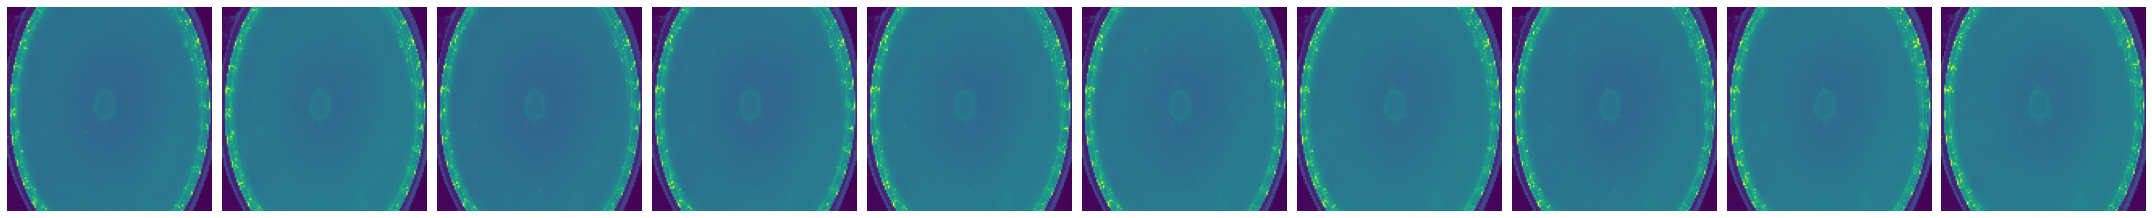

In [13]:
plotImages(train_data)

In [14]:
print(train_data.shape[2])

# Reshape 
img_width  = train_data.shape[1]
img_height = train_data.shape[2]
num_channels = 1
x_train = train_data.reshape(train_data.shape[0], img_height, img_width, num_channels)

input_shape = (img_height, img_width, num_channels)
print(input_shape)

128
(128, 128, 1)


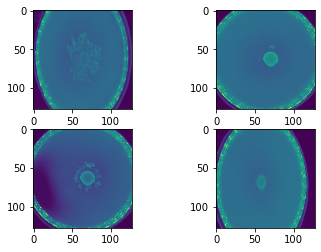

In [15]:
plt.figure(1)
plt.subplot(221)
plt.imshow(x_train[42][:,:,0])

plt.subplot(222)
plt.imshow(x_train[420][:,:,0])

plt.subplot(223)
plt.imshow(x_train[520][:,:,0])

plt.subplot(224)
plt.imshow(x_train[100][:,:,0])

In [16]:
# BUILD THE MODEL

latent_dim = 2048 # Number of latent dim parameters

input_img = Input(shape=input_shape, name='encoder_input')
x = Conv2D(64, 3, padding='same', activation='relu')(input_img)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)

conv_shape = K.int_shape(x) #Shape of conv to be provided to decoder
#Flatten
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)

# Two outputs, for latent mean and log variance (std. dev.)
#Use these to sample random variables in latent space to which inputs are mapped. 
z_mu = Dense(latent_dim, name='latent_mu')(x)   #Mean values of encoded input
z_sigma = Dense(latent_dim, name='latent_sigma')(x)  #Std dev. (variance) of encoded input

#REPARAMETERIZATION TRICK
# Define sampling function to sample from the distribution
# Reparameterize sample based on the process defined by Gunderson and Huang
# into the shape of: mu + sigma squared x eps
#This is to allow gradient descent to allow for gradient estimation accurately. 
def sample_z(args):
  z_mu, z_sigma = args
  eps = K.random_normal(shape=(K.shape(z_mu)[0], K.int_shape(z_mu)[1]))
  return z_mu + K.exp(z_sigma / 2) * eps

# sample vector from the latent distribution
# z is the labda custom layer we are adding for gradient descent calculations
  # using mu and variance (sigma)
z = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([z_mu, z_sigma])

#Z (lambda layer) will be the last layer in the encoder.
# Define and summarize encoder model.
encoder = Model(input_img, [z_mu, z_sigma, z], name='encoder')
print(encoder.summary())

# ================= ###########
# Decoder
#
# ================= #################

# decoder takes the latent vector as input
decoder_input = Input(shape=(latent_dim, ), name='decoder_input')

# Need to start with a shape that can be remapped to original image shape as
#we want our final utput to be same shape original input.
#So, add dense layer with dimensions that can be reshaped to desired output shape
x = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
# reshape to the shape of last conv. layer in the encoder, so we can 
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
# upscale (conv2D transpose) back to original shape
# use Conv2DTranspose to reverse the conv layers defined in the encoder
x = Conv2DTranspose(32, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(32, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, 3, padding='same', activation='relu')(x)
x = Conv2DTranspose(64, 3, padding='same', activation='relu',strides=(2, 2))(x)
#Can add more conv2DTranspose layers, if desired. 
#Using sigmoid activation
x = Conv2DTranspose(num_channels, 3, padding='same', activation='sigmoid', name='decoder_output')(x)

# Define and summarize decoder model
decoder = Model(decoder_input, x, name='decoder')
decoder.summary()

# apply the decoder to the latent sample 
z_decoded = decoder(z)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 64, 64)   0           max_pooling2d[0][0]              
____________________________________________________________________________________________

In [17]:

class CustomLayer(keras.layers.Layer):
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        
        # Reconstruction loss (as we used sigmoid activation we can use binarycrossentropy)
        recon_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_sigma - K.square(z_mu) - K.exp(z_sigma), axis=-1)
        return K.mean(recon_loss + kl_loss)

    # add custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomLayer()([input_img, z_decoded])
# y is basically the original image after encoding input img to mu, sigma, z
# and decoding sampled z values.
#This will be used as output for vae

In [18]:
# =================
# VAE 
# =================
vae = Model(input_img, y, name='vae')

# Compile VAE
vae.compile(optimizer='adam', loss=None)
# vae.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 64, 64)   0           max_pooling2d[0][0]              
________________________________________________________________________________________________

In [52]:
vae.fit(x_train, None, epochs = 50, batch_size = 10, validation_split = 0)

Train on 1608 samples
Epoch 1/50
1608/1608 [==============================] - 11s 7ms/sample - loss: 0.6007
Epoch 2/50
1608/1608 [==============================] - 11s 7ms/sample - loss: 0.6006
Epoch 3/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6005
Epoch 4/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6008
Epoch 5/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6007
Epoch 6/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6004
Epoch 7/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6004
Epoch 8/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6005
Epoch 9/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6006
Epoch 10/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6005
Epoch 11/50
1608/1608 [==============================] - 12s 7ms/sample - loss: 0.6004
Epoch 12/50
1608/1608 [=======

In [53]:
X = train_data

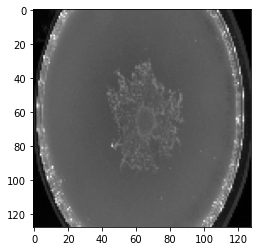

In [54]:
plt.imshow(np.array(X[50]), cmap='gray')

In [55]:
ae_out = encoder.predict(np.array(X[50]).reshape(-1,128,128,1))[0]
print(ae_out)

[[-0.21795735  0.13951163 -0.6347854  ...  0.17667755  0.09909551
  -1.3443478 ]]


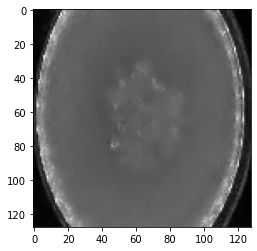

In [56]:

decoded_example = decoder.predict(np.array([ae_out[0]]))
decoded_example_reshaped = decoded_example.reshape(img_width, img_height)
plt.imshow(decoded_example_reshaped, cmap='gray')

In [57]:
import os
import cv2
os.chdir(r"D:\MACHINE_LEARNING\bacteriaLSTM")

data = []
IMG_SIZE = 128

path = r"D:/MACHINE_LEARNING/bacteriaLSTM/"

In [58]:
def create_data():   
    count = 0
    for folder in os.listdir(path):
        _ = []
        print("FOLDER: ",folder)
        for filename in os.listdir(path + folder):
            if(".JPG" in filename): 
                temp_path = path + folder + "/" + filename
                count += 1
                try:
                    img_array = cv2.imread(temp_path)
                    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    _.append(encoder.predict(np.array(img_array/255.0).reshape(-1,128,128,1))[0][0])
                    print("image processed..." + str(count) , end="\r")
                
                except Exception as e:
                    print(e)
        data.append(_)         
create_data()

FOLDER:  2021-02-27
FOLDER:  2021-03-010
FOLDER:  2021-03-030
FOLDER:  2021-03-041
FOLDER:  2021-03-0836
FOLDER:  2021-03-0957
FOLDER:  2021-03-1080
FOLDER:  2021-06-2141
FOLDER:  2021-06-2316
FOLDER:  2021-06-2587
FOLDER:  2021-06-2863
FOLDER:  2021-06-30034
FOLDER:  2021-07-01135
FOLDER:  2021-07-02232


In [59]:
len(data[0])

20

In [60]:
print(data[0][0])

[-0.7882389   0.2775855   0.09005702 ...  0.3795827  -0.92499804
 -1.3490485 ]


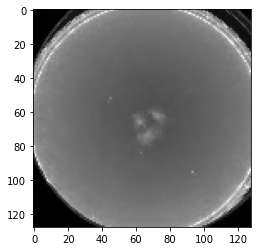

In [61]:
decoded_example = decoder.predict(np.array([data[7][0]]))
decoded_example_reshaped = decoded_example.reshape(img_width, img_height)
plt.imshow(decoded_example_reshaped, cmap='gray')

#### 

In [62]:
for index_movie, movie in enumerate(data):
    while(len(movie)>20):
        for index_frame, frame in enumerate(movie):
            del data[index_movie][index_frame]
            if(len(data[index_movie])<=20):
                break

In [63]:
shifted_data = [i[1:] for i in data]
present_data = [i[0:-1] for i in data]
print(len(shifted_data), len(present_data))

14 14


In [64]:
print(type(present_data))

X = np.array(present_data).reshape(14,19,2048)
X_future = np.array(shifted_data).reshape(14,19,2048)

print(X.shape)
print(X_future.shape)

<class 'list'>
(14, 19, 2048)
(14, 19, 2048)


In [65]:
input_img = Input(shape=(None, 2048))

x = LSTM(2048, return_sequences=True)(input_img)
x = Dropout(0.2)(x)
# x = LSTM(2048)(x)
# x = Dropout(0.2)(x)
x = Dense(2048)(x)
x = Dropout(0.2)(x)
output = Dense(2048, activation='sigmoid')(x)

In [66]:
rnn = Model(input_img, output, name="mnist_test")

In [67]:
rnn.summary()

Model: "mnist_test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 2048)]      0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 2048)        33562624  
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 2048)        0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 2048)        4196352   
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 2048)        0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 2048)        4196352   
Total params: 41,955,328
Trainable params: 41,955,328
Non-trainable params: 0
____________________________________________

In [68]:
rnn.compile(loss="mse", optimizer=Adam(), metrics=['accuracy'])

In [83]:
rnn.fit(batch_size=1, x=X, y= X_future,epochs=100)

Train on 14 samples
Epoch 1/100
14/14 [==============================] - 3s 241ms/sample - loss: 0.2829 - accuracy: 0.0075
Epoch 2/100
14/14 [==============================] - 2s 146ms/sample - loss: 0.2840 - accuracy: 0.0150
Epoch 3/100
14/14 [==============================] - 2s 146ms/sample - loss: 0.2872 - accuracy: 0.0150
Epoch 4/100
14/14 [==============================] - 2s 144ms/sample - loss: 0.2918 - accuracy: 0.0075
Epoch 5/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2875 - accuracy: 0.0113
Epoch 6/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2857 - accuracy: 0.0038
Epoch 7/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2845 - accuracy: 0.0113
Epoch 8/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2837 - accuracy: 0.0150
Epoch 9/100
14/14 [==============================] - 2s 144ms/sample - loss: 0.2834 - accuracy: 0.0075
Epoch 10/100
14/14 [==============================] -

14/14 [==============================] - 2s 144ms/sample - loss: 0.2693 - accuracy: 0.0338
Epoch 80/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2683 - accuracy: 0.0414
Epoch 81/100
14/14 [==============================] - 2s 144ms/sample - loss: 0.2672 - accuracy: 0.0263
Epoch 82/100
14/14 [==============================] - 2s 144ms/sample - loss: 0.2662 - accuracy: 0.0414
Epoch 83/100
14/14 [==============================] - 2s 142ms/sample - loss: 0.2662 - accuracy: 0.0451
Epoch 84/100
14/14 [==============================] - 2s 143ms/sample - loss: 0.2681 - accuracy: 0.0263
Epoch 85/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2686 - accuracy: 0.0789
Epoch 86/100
14/14 [==============================] - 2s 146ms/sample - loss: 0.2674 - accuracy: 0.0526
Epoch 87/100
14/14 [==============================] - 2s 145ms/sample - loss: 0.2680 - accuracy: 0.0602
Epoch 88/100
14/14 [==============================] - 2s 144ms/sample - loss:

In [84]:
print(type(ae_out[0]))

<class 'numpy.ndarray'>


In [85]:
rnn_output = rnn.predict(ae_out[0].reshape(1,1,2048))[0]

In [86]:
type(rnn_output)

numpy.ndarray

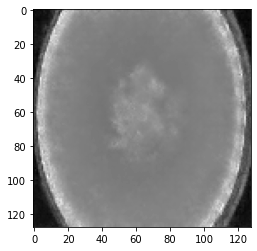

In [87]:
abcd = decoder.predict(np.array(rnn_output))
abcd_re = abcd.reshape(img_width, img_height)
plt.imshow(abcd_re, cmap='gray')

In [88]:
rnn_output_output = rnn.predict(rnn_output[0].reshape(1,1,2048))[0]

In [89]:
type(rnn_output)

numpy.ndarray

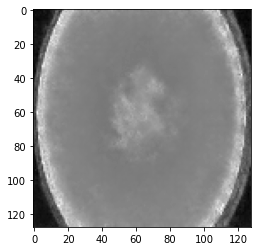

In [90]:
abcd = decoder.predict(np.array(rnn_output_output))
abcd_re = abcd.reshape(img_width, img_height)
plt.imshow(abcd_re, cmap='gray')

In [91]:
rnn_output_output_output = rnn.predict(rnn_output_output[0].reshape(1,1,2048))[0]

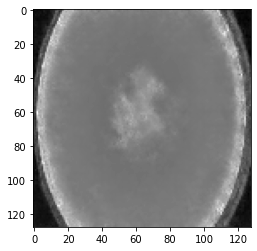

In [92]:
abcd = decoder.predict(np.array(rnn_output_output_output))
abcd_re = abcd.reshape(img_width, img_height)
plt.imshow(abcd_re, cmap='gray')

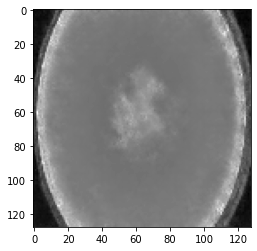

In [93]:
for i in range(1):
    rnn_output_output = rnn.predict(rnn_output_output[0].reshape(1,1,2048))[0]
    abcd = decoder.predict(np.array(rnn_output_output))
    abcd_re = abcd.reshape(img_width, img_height)
    plt.imshow(abcd_re, cmap='gray')

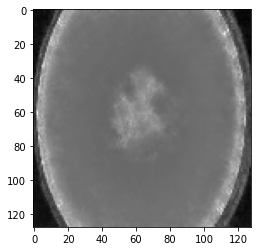

In [94]:
for i in range(5):
    rnn_output_output = rnn.predict(rnn_output_output[0].reshape(1,1,2048))[0]
    abcd = decoder.predict(np.array(rnn_output_output))
    abcd_re = abcd.reshape(img_width, img_height)
    plt.imshow(abcd_re, cmap='gray')

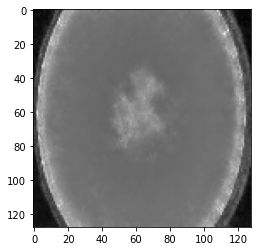

In [95]:
for i in range(10):
    rnn_output_output = rnn.predict(rnn_output_output[0].reshape(1,1,2048))[0]
    abcd = decoder.predict(np.array(rnn_output_output))
    abcd_re = abcd.reshape(img_width, img_height)
    plt.imshow(abcd_re, cmap='gray')

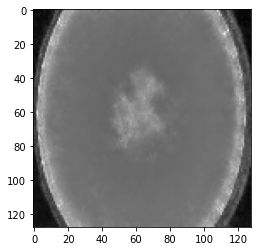

In [96]:
for i in range(50):
    rnn_output_output = rnn.predict(rnn_output_output[0].reshape(1,1,2048))[0]
    abcd = decoder.predict(np.array(rnn_output_output))
    abcd_re = abcd.reshape(img_width, img_height)
    plt.imshow(abcd_re, cmap='gray')